<a href="https://colab.research.google.com/github/SebastianOrmaechea/Analisis-Supervisado-Grupo-32/blob/Sebastian-Ormaechea/Practico_An_Sup_SGO_v3xResguardo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DiploDatos Kaggle Competition

Presentamos un código creado como ejemplo de base para la competición.

Deben:

- Explorar los datos y aprender de ellos.
- Probar diferentes modelos y ver cuáles ajustan mejor dado los datos.
- **Obtener una accuracy mejor que la que se presenta en este ejemplo.**
- Tratar de obtener la accuracy más alta posible!
- Discutir la elección de modelo.

El análisis exploratorio y el preprocesamiento de los datos queda a libertad de cada grupo y no deben quedarse con este simple ejemplo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('train.csv')
print(df.shape)
print(df.describe())

(7823, 14)
       PassengerId          Age   RoomService     FoodCourt  ShoppingMall  \
count  7823.000000  7661.000000   7669.000000   7668.000000   7635.000000   
mean   4345.691039    28.879389    226.078237    455.643062    172.600393   
std    2504.576803    14.461548    679.180148   1621.290107    597.923749   
min       0.000000     0.000000      0.000000      0.000000      0.000000   
25%    2182.500000    19.000000      0.000000      0.000000      0.000000   
50%    4345.000000    27.000000      0.000000      0.000000      0.000000   
75%    6515.500000    38.000000     44.000000     69.000000     28.000000   
max    8692.000000    79.000000  14327.000000  29813.000000  23492.000000   

                Spa        VRDeck  Transported  
count   7665.000000   7654.000000  7823.000000  
mean     305.023222    295.476744     0.506711  
std     1133.423579   1093.485752     0.499987  
min        0.000000      0.000000     0.000000  
25%        0.000000      0.000000     0.000000  
5

In [3]:
#Revisamos si hay registros duplicados y encontramos que no hay ninguno
df.duplicated().any()

False

In [4]:
# Subdivisión del dataset entre variables predictoras (X) y target(y). ¿Y la división entre datos de entrenamiento y test?
y = df.Transported
X = df.drop('Transported',axis=1)
X.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,3430,Europa,False,C/123/P,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,Azhah Tronsive
1,669,Mars,True,F/126/S,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,Roswal Sha
2,8430,Europa,True,B/343/S,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,Shaiam Tinganking
3,6463,Earth,False,F/1420/P,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,Landa Grifford
4,85,Earth,False,G/9/P,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,Gracy Dunnisey


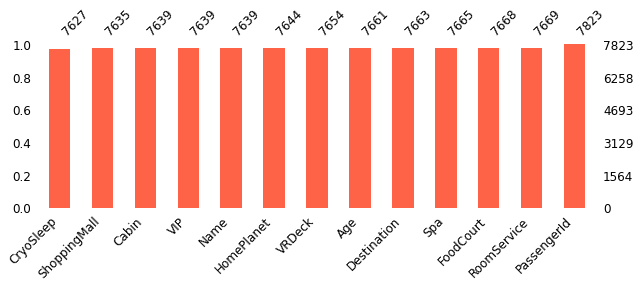

In [5]:
# Utilizamos la librería missingno para el análisis de datos faltantes 
import missingno as msno
# Graficamos los datos faltantes de varias variables, incluidas las de interés. Observamos que hay valores faltantes pero no son muchos
msno.bar(X,figsize=(10, 3), sort="ascending",fontsize=12, color='tomato')

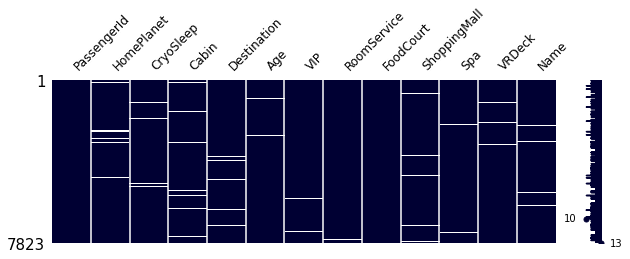

In [6]:
# Analizamos si hay una correlación o correspondencia entre los datos faltantes con la siguiente gráfica.
# Vemos que no hay correspondencia por lo que la falta de valores no obedece a una misma causa y puede ser aleatoria 
msno.matrix(X,figsize=(10, 3), fontsize=12, color=[0,0,0.2])

In [7]:
#Subdividimos la columna Cabin para poder utilizar sus características como variables independientes
X[['Piso','Num', "Lado"]] = X.Cabin.str.split('/',expand=True)

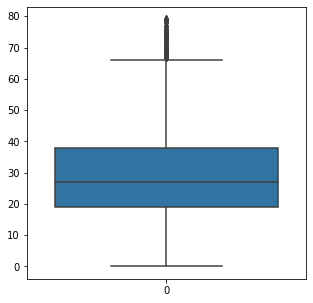

In [8]:
# Evaluamos presencia de outliers en la variable edad y en las de gastos realizados. No se encuentran outliers que impliquen datos erróneos
import seaborn as sns
plt.figure(figsize=(5,5))
sns.boxplot(data=X['Age'])

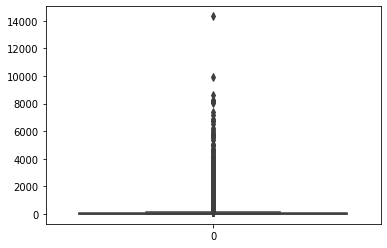

In [9]:
sns.boxplot(data=X['RoomService'])

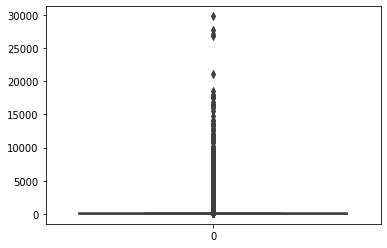

In [10]:
sns.boxplot(data=X['FoodCourt'])

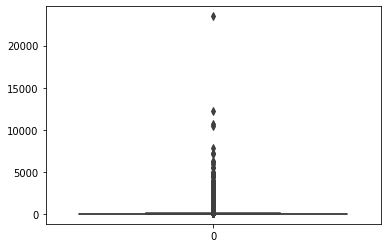

In [11]:
sns.boxplot(data=X['ShoppingMall'])

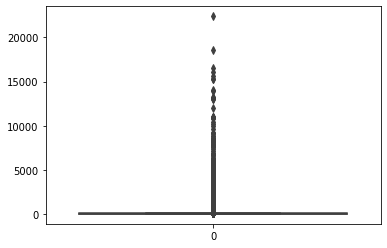

In [12]:
sns.boxplot(data=X['Spa'])

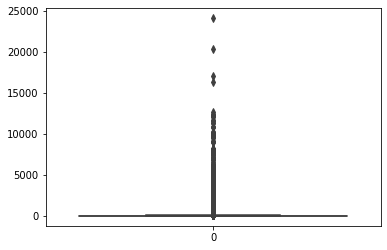

In [13]:
sns.boxplot(data=X['VRDeck'])

In [14]:
# Convertimos las variables a un dtype conveniente
X[["HomePlanet", "CryoSleep", "Destination", "VIP", 'Piso', "Lado"]]  = X[["HomePlanet", "CryoSleep", "Destination", "VIP", 'Piso', "Lado"]].astype("category")
X[["Num"]]  = X[["Num"]].astype("float")
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   7823 non-null   int64   
 1   HomePlanet    7644 non-null   category
 2   CryoSleep     7627 non-null   category
 3   Cabin         7639 non-null   object  
 4   Destination   7663 non-null   category
 5   Age           7661 non-null   float64 
 6   VIP           7639 non-null   category
 7   RoomService   7669 non-null   float64 
 8   FoodCourt     7668 non-null   float64 
 9   ShoppingMall  7635 non-null   float64 
 10  Spa           7665 non-null   float64 
 11  VRDeck        7654 non-null   float64 
 12  Name          7639 non-null   object  
 13  Piso          7639 non-null   category
 14  Num           7639 non-null   float64 
 15  Lado          7639 non-null   category
dtypes: category(6), float64(7), int64(1), object(2)
memory usage: 658.1+ KB


In [15]:
# Dividimos el dataset antes de la imputación y el escalamiento para evitar el data leakage
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 8)

In [16]:
# Imputamos valores faltantes en las columnas categóricas y booleanas con el valor más frecuente. TRAIN DATASET
imputer = SimpleImputer(strategy="most_frequent")
x_train[["HomePlanet", "Destination", 'Piso', "Lado", "CryoSleep", "VIP"]] = imputer.fit_transform(x_train[["HomePlanet", "Destination", 'Piso', "Lado", "CryoSleep", "VIP"]])
x_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Piso,Num,Lado
4320,5890,Earth,True,G/1010/S,PSO J318.5-22,33.0,False,0.0,0.0,0.0,0.0,0.0,Holey Maystuarey,G,1010.0,S
1437,3770,Earth,True,NaN,TRAPPIST-1e,10.0,False,0.0,0.0,0.0,0.0,0.0,Luise Carpennels,F,NaN,S
1690,8070,Earth,False,F/1664/S,PSO J318.5-22,49.0,False,0.0,18.0,0.0,0.0,686.0,Enry Johnsondez,F,1664.0,S
3525,4575,Mars,False,F/927/S,TRAPPIST-1e,25.0,False,750.0,0.0,109.0,368.0,0.0,Teda Ane,F,927.0,S
4700,699,Earth,False,NaN,TRAPPIST-1e,19.0,False,0.0,714.0,2.0,0.0,0.0,Jilla Bairdford,F,NaN,S


In [17]:
# Imputamos valores faltantes en las columnas cuantitativas con KNN. TRAIN DATASET
Qcols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
from sklearn.impute import KNNImputer
imputerKNN = KNNImputer()
x_train[Qcols] = imputerKNN.fit_transform(x_train[Qcols])

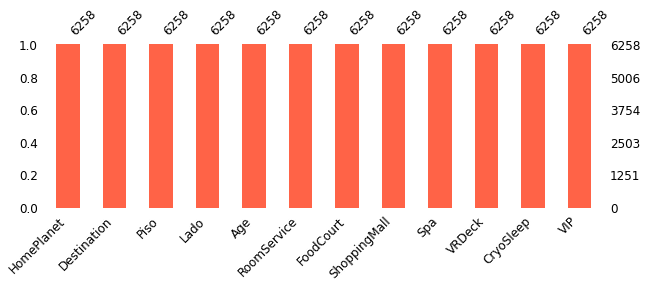

In [18]:
# Verificamos que no haya valores faltantes en las columnas a utilizar para la predicción
interest_cols = ["HomePlanet", "Destination", 'Piso', "Lado", 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', "CryoSleep", "VIP"]
msno.bar(x_train[interest_cols],figsize=(10, 3), sort="ascending",fontsize=12, color='tomato')

In [19]:
x_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Piso,Num,Lado
4320,5890,Earth,True,G/1010/S,PSO J318.5-22,33.0,False,0.0,0.0,0.0,0.0,0.0,Holey Maystuarey,G,1010.0,S
1437,3770,Earth,True,NaN,TRAPPIST-1e,10.0,False,0.0,0.0,0.0,0.0,0.0,Luise Carpennels,F,NaN,S
1690,8070,Earth,False,F/1664/S,PSO J318.5-22,49.0,False,0.0,18.0,0.0,0.0,686.0,Enry Johnsondez,F,1664.0,S
3525,4575,Mars,False,F/927/S,TRAPPIST-1e,25.0,False,750.0,0.0,109.0,368.0,0.0,Teda Ane,F,927.0,S
4700,699,Earth,False,NaN,TRAPPIST-1e,19.0,False,0.0,714.0,2.0,0.0,0.0,Jilla Bairdford,F,NaN,S


In [20]:
# Escalamos los datos cuantitativos mediante Robust Scaler para controlar outliers
from sklearn import preprocessing
escalador = preprocessing.RobustScaler()
x_train[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = escalador.fit_transform(x_train[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])
x_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Piso,Num,Lado
4320,5890,Earth,True,G/1010/S,PSO J318.5-22,0.333333,False,0.000000,0.000000,0.000000,0.000000,0.000000,Holey Maystuarey,G,1010.0,S
1437,3770,Earth,True,NaN,TRAPPIST-1e,-0.944444,False,0.000000,0.000000,0.000000,0.000000,0.000000,Luise Carpennels,F,NaN,S
1690,8070,Earth,False,F/1664/S,PSO J318.5-22,1.222222,False,0.000000,0.264706,0.000000,0.000000,13.192308,Enry Johnsondez,F,1664.0,S
3525,4575,Mars,False,F/927/S,TRAPPIST-1e,-0.111111,False,16.304348,0.000000,3.516129,5.935484,0.000000,Teda Ane,F,927.0,S
4700,699,Earth,False,NaN,TRAPPIST-1e,-0.444444,False,0.000000,10.500000,0.064516,0.000000,0.000000,Jilla Bairdford,F,NaN,S


In [21]:
# Revisamos las variables categóricas antes de aplicar la codificación
print(x_train["HomePlanet"].value_counts())
print(x_train["Destination"].value_counts())
print(x_train["Piso"].value_counts())
print(x_train["Lado"].value_counts())

Earth     3454
Europa    1529
Mars      1275
Name: HomePlanet, dtype: int64
TRAPPIST-1e      4352
55 Cancri e      1324
PSO J318.5-22     582
Name: Destination, dtype: int64
F    2167
G    1829
E     636
B     549
C     535
D     355
A     183
T       4
Name: Piso, dtype: int64
S    3224
P    3034
Name: Lado, dtype: int64


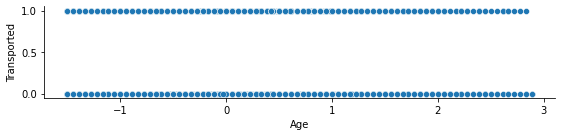

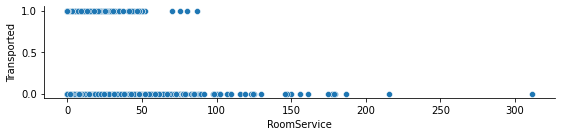

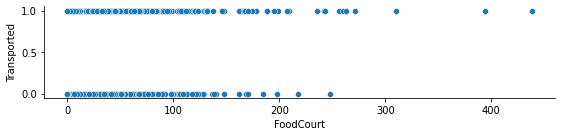

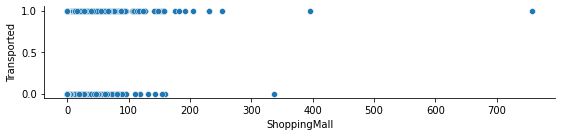

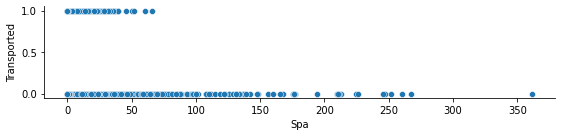

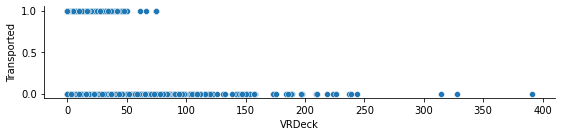

In [22]:
# Visualizamos la relación de las variables cuantitativas con el target
sns.relplot(y=y_train, x=x_train.Age,height=2, aspect=4)
sns.relplot(y=y_train, x=x_train.RoomService,height=2, aspect=4)
sns.relplot(y=y_train, x=x_train.FoodCourt,height=2, aspect=4)
sns.relplot(y=y_train, x=x_train.ShoppingMall,height=2, aspect=4)
sns.relplot(y=y_train, x=x_train.Spa,height=2, aspect=4)
sns.relplot(y=y_train, x=x_train.VRDeck,height=2, aspect=4)

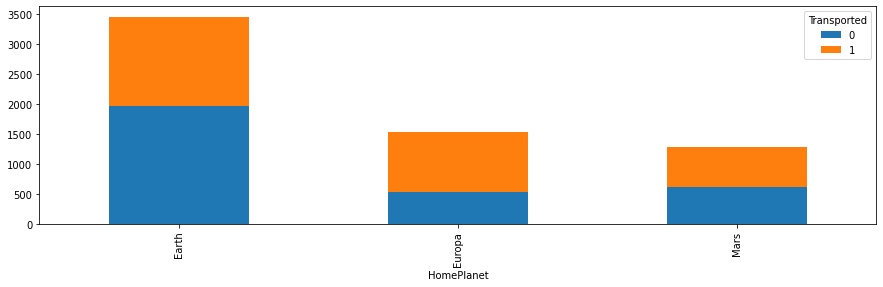

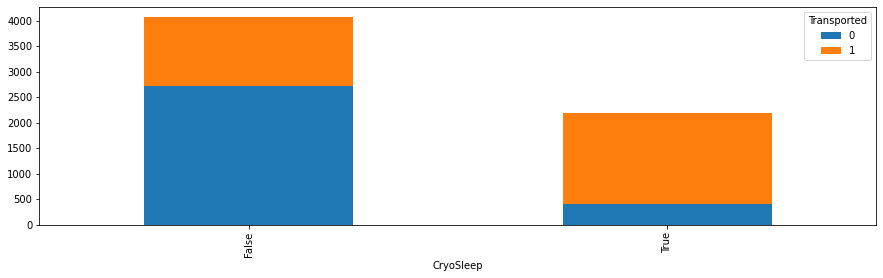

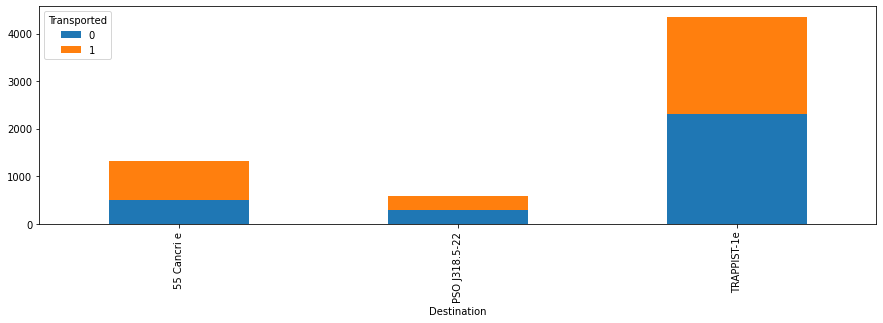

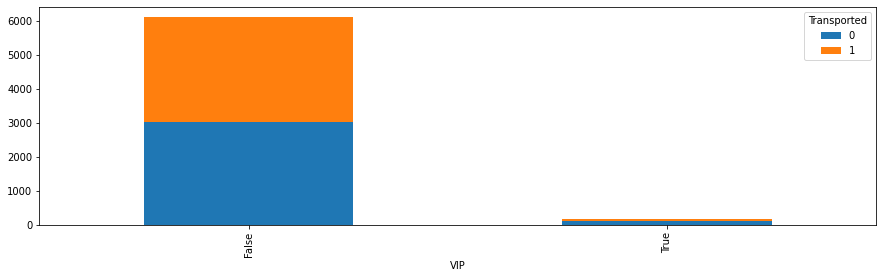

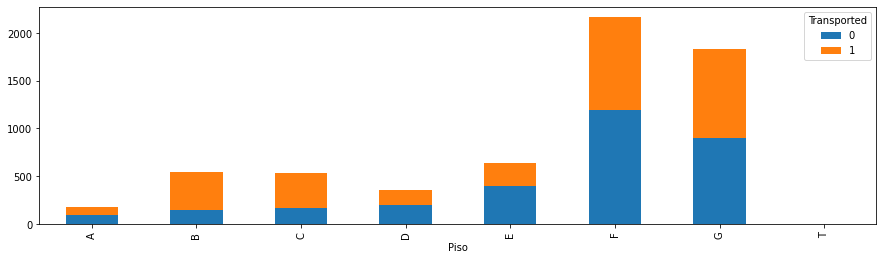

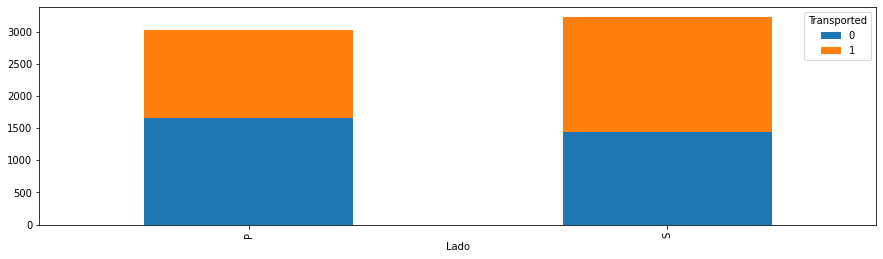

In [23]:
# Visualizamos la relación de las variables categóricas y binarias con el target
pd.crosstab(x_train.HomePlanet,y_train).plot.bar(stacked=True, figsize=[15,4])
pd.crosstab(x_train.CryoSleep,y_train).plot.bar(stacked=True, figsize=[15,4])
pd.crosstab(x_train.Destination,y_train).plot.bar(stacked=True, figsize=[15,4])
pd.crosstab(x_train.VIP,y_train).plot.bar(stacked=True, figsize=[15,4])
pd.crosstab(x_train.Piso,y_train).plot.bar(stacked=True, figsize=[15,4])
pd.crosstab(x_train.Lado,y_train).plot.bar(stacked=True, figsize=[15,4])

In [25]:
# Aplicamos hot encoding a las categóricas
x_train_hot = pd.get_dummies(data=x_train, columns=["HomePlanet", "Destination", 'Piso', "Lado"]).drop(columns=['Cabin', 'Num', 'Name'])
x_train_hot.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,...,Piso_A,Piso_B,Piso_C,Piso_D,Piso_E,Piso_F,Piso_G,Piso_T,Lado_P,Lado_S
4320,5890,True,0.333333,False,0.000000,0.000000,0.000000,0.000000,0.000000,1,...,0,0,0,0,0,0,1,0,0,1
1437,3770,True,-0.944444,False,0.000000,0.000000,0.000000,0.000000,0.000000,1,...,0,0,0,0,0,1,0,0,0,1
1690,8070,False,1.222222,False,0.000000,0.264706,0.000000,0.000000,13.192308,1,...,0,0,0,0,0,1,0,0,0,1
3525,4575,False,-0.111111,False,16.304348,0.000000,3.516129,5.935484,0.000000,0,...,0,0,0,0,0,1,0,0,0,1
4700,699,False,-0.444444,False,0.000000,10.500000,0.064516,0.000000,0.000000,1,...,0,0,0,0,0,1,0,0,0,1


In [74]:
# Transformaciones sobre el TEST DATASET
# Imputamos valores faltantes en las columnas categóricas y booleanas con el valor más frecuente.
imputer = SimpleImputer(strategy="most_frequent")
x_test[["HomePlanet", "Destination", 'Piso', "Lado", "CryoSleep", "VIP"]] = imputer.fit_transform(x_test[["HomePlanet", "Destination", 'Piso', "Lado", "CryoSleep", "VIP"]])
# Imputamos valores faltantes en las columnas cuantitativas con KNN. 
Qcols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
imputerKNN = KNNImputer()
x_test[Qcols] = imputerKNN.fit_transform(x_test[Qcols])

# Escalamiento
escalador = preprocessing.RobustScaler()
x_test[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = escalador.fit_transform(x_test[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])

# Hot encoding a las categóricas
x_test_hot = pd.get_dummies(data=x_test, columns=["HomePlanet", "Destination", 'Piso', "Lado"]).drop(columns=['Cabin', 'Num', 'Name'])

### Planteo modelos
Tienen que elegir los 2 mejores modelos así que prueben con varios.

In [30]:
# Planteo de modelo SGDClassifier con parámetros por defecto
from sklearn.linear_model import SGDClassifier
Simple_model = SGDClassifier(random_state=1)
Simple_model.fit(x_train_hot, y_train)
y_train_pred = Simple_model.predict(x_train_hot)
#y_test_pred = Simple_model.predict(x_test)
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(y_train, y_train_pred)
#test_acc = accuracy_score(y_test, y_test_pred)
print(f'Train accuracy: {train_acc:0.3}')
#print(f'Test accuracy: {test_acc:0.3}')

Train accuracy: 0.729


In [36]:
# Planteo de modelo SGDClassifier con parámetros definidos por GridSearch 
max_iter = [10000, 100000, 1000000]
eta0 = [0.0001, 0.001, 0.01, 0.1, 1, 10, 1000000]
F_model = SGDClassifier(random_state=1)
F_model.fit(x_train_hot, y_train)
param_grid = {'max_iter': max_iter,'eta0':eta0}
cv = GridSearchCV(F_model, param_grid, cv=5)
cv.fit(x_train_hot, y_train)
best_params=cv.best_params_
Best_F_model = SGDRegressor(max_iter=best_params["max_iter"], eta0=best_params["eta0"], random_state=1)
Best_F_model.fit(x_train_hot, y_train)
y_train_pred = F_model.predict(x_train_hot)
train_acc = accuracy_score(y_train, y_train_pred)
print(f'Train accuracy: {train_acc:0.3}')

Train accuracy: 0.729


In [35]:
# Planteo de modelo DecisionTreeClassifier con parámetros Caro
Tree_model = DecisionTreeClassifier(criterion= 'entropy', max_depth= 10, splitter= 'best', random_state=1)
Tree_model.fit(x_train_hot, y_train)
y_train_pred = Tree_model.predict(x_train_hot)
#y_test_pred = Tree_model.predict(x_test)

train_acc = accuracy_score(y_train, y_train_pred)
#test_acc = accuracy_score(y_test, y_test_pred)
print(f'Train accuracy: {train_acc:0.3}')
#print(f'Test accuracy: {test_acc:0.3}')

Train accuracy: 0.846


In [45]:
# Planteo de modelo DecisionTreeClassifier con best params mediante GridSearch
from sklearn import tree
for n, criterion in enumerate(('gini','entropy')):
    param_grid2 = {
     'max_depth': [10,11,12,13,14,15],  # Profundidad máxima del árbol
        'min_samples_leaf': [1,2],  # Cantidad mínima de samples por hoja
    }
    modelt = tree.DecisionTreeClassifier(random_state=22,criterion=criterion)
    cvt = GridSearchCV(modelt, param_grid2, scoring='accuracy',cv=5)
    cvt.fit(x_train_hot, y_train)

    print("******************************************************************")
    print("*********Hiperparámetros para citerio de partición",criterion,"*********")
    print("Mejor conjunto de parámetros:")
    print(cvt.best_params_)
    print("Best accuracy: %0.03f" % cvt.score(x_train_hot,y_train))

    y_train_predtt = cvt.predict(x_train_hot)
    print("****Reporte de clasificación sobre conjunto de entrenamiento (métricas)*****") 
    print(classification_report(y_train, y_train_predtt)) 
        
    meant = cvt.cv_results_['mean_test_score']
    stdt = cvt.cv_results_['std_test_score']
    for mean, std, params in zip(meant, stdt, cvt.cv_results_['params']):
        print("Ac.promedio: %0.4f y var (+/-%0.04f) para los parámetros %r" % (mean, std ** 2, params))

******************************************************************
*********Hiperparámetros para citerio de partición gini *********
Mejor conjunto de parámetros:
{'max_depth': 10, 'min_samples_leaf': 1}
Best accuracy: 0.856
****Reporte de clasificación sobre conjunto de entrenamiento (métricas)*****
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      3111
           1       0.84      0.89      0.86      3147

    accuracy                           0.86      6258
   macro avg       0.86      0.86      0.86      6258
weighted avg       0.86      0.86      0.86      6258

Ac.promedio: 0.7584 y var (+/-0.0001) para los parámetros {'max_depth': 10, 'min_samples_leaf': 1}
Ac.promedio: 0.7569 y var (+/-0.0001) para los parámetros {'max_depth': 10, 'min_samples_leaf': 2}
Ac.promedio: 0.7555 y var (+/-0.0001) para los parámetros {'max_depth': 11, 'min_samples_leaf': 1}
Ac.promedio: 0.7555 y var (+/-0.0001) para los parámetros {'max_depth': 11

In [46]:
clasiftt = tree.DecisionTreeClassifier(random_state=22, criterion="entropy",
                                       max_depth=11, min_samples_leaf=2)
clasiftt.fit(x_train_hot, y_train)
print("Train dataset accuracy: %0.03f" % clasiftt.score(x_train_hot,y_train))

Train dataset accuracy: 0.855


Selección Multimodelos

In [52]:
import os
import numpy as np  # linear algebra
import pandas as pd  #
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn.metrics import confusion_matrix

In [53]:
#Dataframe de resultados
cols = ['Case','SGD','Ridge','KNN','SVM','Bagging','RndForest','LogReg','LGB']

resul = pd.DataFrame(columns=cols)
resul.set_index("Case",inplace=True)
resul.loc['Standard'] = [0,0,0,0,0,0,0,0]
resul.loc['GridSearch'] = [0,0,0,0,0,0,0,0]
resul.loc['RandomSearch'] = [0,0,0,0,0,0,0,0]
resul.loc['Hyperopt'] = [0,0,0,0,0,0,0,0]
resul.head()

,SGD,Ridge,KNN,SVM,Bagging,RndForest,LogReg,LGB
Case,,,,,,,,
Standard,0,0,0,0,0,0,0,0
GridSearch,0,0,0,0,0,0,0,0
RandomSearch,0,0,0,0,0,0,0,0
Hyperopt,0,0,0,0,0,0,0,0


In [84]:
# Acondicionamiento de detalles en el TRAIN DATASET
#x_train_hot = x_train_hot.drop(columns=['Piso_T'])
print(x_train_hot.shape)
print(x_test_hot.shape)
x_train_hot[["CryoSleep", "VIP"]] = x_train_hot[["CryoSleep", "VIP"]].astype("float64")
x_test_hot[["CryoSleep", "VIP"]] = x_test_hot[["CryoSleep", "VIP"]].astype("float64")

(6258, 24)
(1565, 24)


In [85]:
#Creación de Modelos
sgd   = SGDClassifier()
ridge = RidgeClassifier()
knn   = KNeighborsClassifier()
svc   = SVC(gamma='auto')
bag   = BaggingClassifier()
rf    = RandomForestClassifier(n_estimators=10)
lr    =  LogisticRegression(solver='liblinear')
lgg   = lgb.LGBMClassifier()

models = [sgd,ridge,knn,svc,bag,rf,lr,lgg]

col = 0
for model in models:
    model.fit(x_train_hot,y_train.values.ravel())
    resul.iloc[0,col] = model.score(x_test_hot,y_test)
    col += 1

resul.head()

,SGD,Ridge,KNN,SVM,Bagging,RndForest,LogReg,LGB
Case,,,,,,,,
Standard,0.760383,0.771885,0.654313,0.684984,0.784026,0.780192,0.792332,0.814058
GridSearch,0,0,0,0,0,0,0,0
RandomSearch,0,0,0,0,0,0,0,0
Hyperopt,0,0,0,0,0,0,0,0


In [86]:
# Aplicación de GridSearch
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

#SGD
loss = ['hinge', 'modified_huber', 'log']
penalty = ['l1','l2']
alpha= [0.0001,0.001,0.01,0.1]
l1_ratio= [0.15,0.05,.025]
max_iter = [1,5,10,100,1000,10000]
sgd_grid = dict(loss=loss,penalty=penalty,max_iter=max_iter,alpha=alpha,l1_ratio=l1_ratio)

#Ridge
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
ridge_grid = dict(alpha=alpha)

#K-Nearest - Neighborg
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
knn_grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

#Support Vector Classifier
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
svc_grid = dict(kernel=kernel,C=C,gamma=gamma)

#Bagging Classifier
n_estimators = [10, 100, 1000]
bag_grid = dict(n_estimators=n_estimators)

#Random Forest
n_estimators = [10, 100, 1000,10000]
max_features = ['sqrt', 'log2']
rf_grid = dict(n_estimators=n_estimators,max_features=max_features)

#Logistic Regression
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
lr_grid = dict(solver=solvers,penalty=penalty,C=c_values)

#LGB
class_weight = [None,'balanced']
boosting_type = ['gbdt', 'goss', 'dart']
num_leaves = [30,50,100,150] #list(range(30, 150)),
learning_rate = list(np.logspace(np.log(0.005), np.log(0.2), base = np.exp(1), num = 10)) #1000
lgg_grid = dict(class_weight=class_weight, boosting_type=boosting_type, num_leaves=num_leaves, learning_rate =learning_rate)

In [87]:
models = [sgd,ridge,knn,svc,bag,rf,lr,lgg]

grids = [sgd_grid,ridge_grid,knn_grid,svc_grid,bag_grid,rf_grid,lr_grid,lgg_grid]
col = 0

for ind in range(0,len(models)):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3,random_state=1)
    grid_search = GridSearchCV(estimator=models[col], 
                  param_grid=grids[col], n_jobs=-1, cv=cv,  
                  scoring='accuracy',error_score=0)
    grid_clf_acc = grid_search.fit(x_train_hot, y_train)
    resul.iloc[1,col] = grid_clf_acc.score(x_test_hot,y_test)
    col += 1

resul.head()

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


KeyboardInterrupt: ignored

In [ ]:
# Aplicamos RandomSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

col = 0
for ind in range(0,len(models)):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, 
                                 random_state=1)
    n_iter_search = 3
    random_search = RandomizedSearchCV(models[col],
    param_distributions=grids[col],n_iter=n_iter_search, cv=cv)
    random_search.fit(x_train_hot,y_train)
    resul.iloc[2,col] = random_search.score(x_test_hot,y_test)
    col += 1
    
resul.head()

## Generar la salida para entregar

In [ ]:
test_df = pd.read_csv('test.csv')

In [ ]:
test_df

Para poder evaluar nuestra predicción los datos de prueba deben tener exactamente el mismo tratamiento que los datos de entrenamiento

In [ ]:
test_df[imputer_cols] = imputer.fit_transform(test_df[imputer_cols])

PassengerId = test_df['PassengerId']
test_df.drop(['PassengerId','Cabin', 'Name'], inplace=True, axis=1)

for col in label_cols:
    test_df[col] = test_df[col].astype(str)
    test_df[col] = LabelEncoder().fit_transform(test_df[col])

cols = test_df.columns
test_df = StandardScaler().fit_transform(test_df)
test_df = pd.DataFrame(test_df, columns=cols)

Generamos la salida

In [ ]:
test_id = PassengerId
test_pred = clf.predict(test_df)


In [ ]:
submission = pd.DataFrame(list(zip(test_id, test_pred)), columns=["PassengerId", "Transported"])
submission.to_csv("sample_submission.csv", header=True, index=False)